# 07. Data Grouping and Filtering

Another quite popular operations to perform on data are **grouping** and **filtering**.
The former is used to group values into mulitple subgroups and operate on specific groups; the latter is to dwelve into data based on specific categories or filters on values.
Most of the time, these two operations are performed together.

Pandas allows to do group and filtering, thanks to the `groupby` and `filter` functions. 

We will see examples in this notebook.

**Note** 

In this notebook, we will be using `numpy.random` functions for random selection of values and random number generations to work on fake data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [3]:
n = 500

gender_data = []
income_data = []

for i in range(0, 500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[:10]

['Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female']

In [5]:
income_data[:10]

['Poor',
 'Poor',
 'Rich',
 'Middle Class',
 'Middle Class',
 'Middle Class',
 'Middle Class',
 'Poor',
 'Middle Class',
 'Rich']

Z -> N(0, 1)
<br>
N(m, s) -> m + s * Z

In [6]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [7]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [8]:
data.head(30)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,147.973966,71.389426,47.799681,20856.352489
1,Female,Poor,137.044693,63.778397,36.573264,19648.390400
2,Male,Rich,140.582055,71.932492,42.795087,20170.940083
3,Female,Middle Class,132.644205,91.800455,31.395468,20600.771197
4,Male,Middle Class,174.679177,70.216800,39.045195,18833.234298
5,Female,Middle Class,124.912210,90.964401,21.440101,20069.545758
6,Male,Middle Class,149.558463,76.609542,40.541699,18725.534902
7,Female,Poor,144.381822,39.566705,28.906693,21455.322150
8,Female,Middle Class,123.964206,66.883007,29.834045,18047.894110
9,Female,Rich,118.924721,41.447451,37.523290,20051.364006


## Data Grouping

In [14]:
data.head(5)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,147.973966,71.389426,47.799681,20856.352489
1,Female,Poor,137.044693,63.778397,36.573264,19648.390400
2,Male,Rich,140.582055,71.932492,42.795087,20170.940083
3,Female,Middle Class,132.644205,91.800455,31.395468,20600.771197
4,Male,Middle Class,174.679177,70.216800,39.045195,18833.234298


In [9]:
grouped_gender = data.groupby("Gender")

In [10]:
grouped_gender.groups

{'Female': [0, 1, 3, 5, 7, 8, 9, 11, 12, 13, 15, 16, 21, 22, 23, 27, 28, 29, 30, 31, 33, 34, 38, 40, 41, 42, 43, 44, 45, 46, 48, 50, 54, 56, 57, 58, 60, 62, 64, 65, 66, 69, 70, 71, 73, 79, 80, 86, 87, 91, 93, 94, 96, 97, 98, 99, 101, 102, 103, 104, 106, 109, 110, 114, 116, 118, 120, 121, 123, 125, 126, 129, 130, 132, 133, 134, 136, 138, 141, 142, 143, 144, 145, 146, 148, 150, 151, 152, 153, 157, 159, 161, 162, 163, 164, 168, 169, 170, 174, 176, ...], 'Male': [2, 4, 6, 10, 14, 17, 18, 19, 20, 24, 25, 26, 32, 35, 36, 37, 39, 47, 49, 51, 52, 53, 55, 59, 61, 63, 67, 68, 72, 74, 75, 76, 77, 78, 81, 82, 83, 84, 85, 88, 89, 90, 92, 95, 100, 105, 107, 108, 111, 112, 113, 115, 117, 119, 122, 124, 127, 128, 131, 135, 137, 139, 140, 147, 149, 154, 155, 156, 158, 160, 165, 166, 167, 171, 172, 173, 175, 178, 182, 183, 184, 185, 186, 187, 191, 192, 194, 198, 201, 204, 206, 207, 208, 214, 215, 216, 218, 219, 220, 223, ...]}

In [33]:
for n, m in grouped_gender:
    print(n)
    print(m)

Female
     Gender Economic Status      Height      Weight        Age        Income
0    Female            Poor  147.973966   71.389426  47.799681  20856.352489
1    Female            Poor  137.044693   63.778397  36.573264  19648.390400
3    Female    Middle Class  132.644205   91.800455  31.395468  20600.771197
5    Female    Middle Class  124.912210   90.964401  21.440101  20069.545758
7    Female            Poor  144.381822   39.566705  28.906693  21455.322150
..      ...             ...         ...         ...        ...           ...
487  Female            Rich  139.809768   92.367338  42.618827  19740.008755
490  Female            Poor  171.196502   50.843127  51.503672  19118.031849
493  Female            Poor  169.708627   66.364659  20.324521  19409.283212
495  Female            Poor  224.713746   12.138051  29.020165  20129.014839
497  Female            Rich  126.689176  100.509266  13.601540  20536.626849

[262 rows x 6 columns]
Male
    Gender Economic Status      Height  

In [32]:
for n, m in grouped_gender:
    if n == 'Female':
        print(m)

     Gender Economic Status      Height      Weight        Age        Income
0    Female            Poor  147.973966   71.389426  47.799681  20856.352489
1    Female            Poor  137.044693   63.778397  36.573264  19648.390400
3    Female    Middle Class  132.644205   91.800455  31.395468  20600.771197
5    Female    Middle Class  124.912210   90.964401  21.440101  20069.545758
7    Female            Poor  144.381822   39.566705  28.906693  21455.322150
..      ...             ...         ...         ...        ...           ...
487  Female            Rich  139.809768   92.367338  42.618827  19740.008755
490  Female            Poor  171.196502   50.843127  51.503672  19118.031849
493  Female            Poor  169.708627   66.364659  20.324521  19409.283212
495  Female            Poor  224.713746   12.138051  29.020165  20129.014839
497  Female            Rich  126.689176  100.509266  13.601540  20536.626849

[262 rows x 6 columns]


In [35]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,147.973966,71.389426,47.799681,20856.352489
1,Female,Poor,137.044693,63.778397,36.573264,19648.390400
3,Female,Middle Class,132.644205,91.800455,31.395468,20600.771197
5,Female,Middle Class,124.912210,90.964401,21.440101,20069.545758
7,Female,Poor,144.381822,39.566705,28.906693,21455.322150
...,...,...,...,...,...,...
487,Female,Rich,139.809768,92.367338,42.618827,19740.008755
490,Female,Poor,171.196502,50.843127,51.503672,19118.031849
493,Female,Poor,169.708627,66.364659,20.324521,19409.283212
495,Female,Poor,224.713746,12.138051,29.020165,20129.014839


In [38]:
data_ex = data.groupby('Economic Status')

In [45]:
data_ex.get_group('Rich')

,Gender,Economic Status,Height,Weight,Age,Income
2,Male,Rich,140.582055,71.932492,42.795087,20170.940083
9,Female,Rich,118.924721,41.447451,37.523290,20051.364006
14,Male,Rich,144.287061,97.944580,21.764823,20098.150107
16,Female,Rich,166.604584,50.344468,15.734411,20993.265893
18,Male,Rich,168.929803,65.666429,10.924235,21041.437019
...,...,...,...,...,...,...
487,Female,Rich,139.809768,92.367338,42.618827,19740.008755
489,Male,Rich,150.793328,63.179450,31.833275,19335.137470
494,Male,Rich,155.676597,114.943704,20.097463,21432.644688
496,Male,Rich,157.939153,92.973014,50.673182,19184.804433


In [46]:
double_group = data.groupby(["Gender", "Economic Status"])

In [47]:
len(double_group)

6

In [48]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
3    Female    Middle Class  132.644205   91.800455  31.395468  20600.771197
5    Female    Middle Class  124.912210   90.964401  21.440101  20069.545758
8    Female    Middle Class  123.964206   66.883007  29.834045  18047.894110
11   Female    Middle Class  185.849120  109.328279  25.655162  20668.865148
12   Female    Middle Class  167.593625   79.127014  43.413666  19515.297249
..      ...             ...         ...         ...        ...           ...
475  Female    Middle Class  199.215931   40.860262  24.910389  18513.098866
476  Female    Middle Class  159.913791   39.383904  43.852250  19849.760524
478  Female    Middle Class  162.931784   76.209271  39.951101  18723.884315
482  Female    Middle Class  162.800231   51.531530  36.482756  19164.840702
485  Female    Middle Class  174.969976   53.939215  24.229077  20481.601681

[90 rows x 6 columns]
('Female', 'Poor')
     Ge

## Operations on Groups

In [49]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     14220.499978  6102.649387  2570.646045  1.784262e+06
       Poor             14589.098304  5614.102768  2824.411366  1.804430e+06
       Rich             12758.393042  4964.366209  2571.560494  1.589599e+06
Male   Middle Class     11833.091148  4857.936408  2232.875181  1.482211e+06
       Poor             15105.609904  5852.597596  2907.935945  1.834680e+06
       Rich             10927.185697  4703.935237  2088.887673  1.380491e+06

In [50]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     158.005555  67.807215  28.562734  19825.138764
       Poor             160.319762  61.693437  31.037488  19828.898434
       Rich             157.511025  61.288472  31.747660  19624.677610
Male   Middle Class     157.774549  64.772485  29.771669  19762.816188
       Poor             162.425913  62.931157  31.268128  19727.745298
       Rich             156.102653  67.199075  29.841252  19721.298649

In [51]:
double_group.size()

Gender  Economic Status
Female  Middle Class       90
        Poor               91
        Rich               81
Male    Middle Class       75
        Poor               93
        Rich               70
dtype: int64

In [52]:
double_group.describe()

Height                                                \
                        count        mean        std        min         25%   
Gender Economic Status                                                        
Female Middle Class      90.0  158.005555  30.183631  97.325924  133.923735   
       Poor              91.0  160.319762  29.187920  94.724178  140.344023   
       Rich              81.0  157.511025  31.307179  88.948460  139.809768   
Male   Middle Class      75.0  157.774549  30.537972  80.378257  140.854958   
       Poor              93.0  162.425913  26.771865  98.190871  144.918921   
       Rich              70.0  156.102653  26.002675  96.696123  140.432783   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     162.828234  176.956773  218.624805   90.0  67.807215   
       Poor             157.777752  178.407092  224.713746   91.0  61.693437   
       Rich             158.917441  176.609871  220.316182   81.0  61.288472   
Male   Middle Class     153.247309  176.977980  223.504986   75.0  64.772485   
       Poor             157.281032  184.550557  224.342250   93.0  62.931157   
       Rich             154.532341  175.896607  225.878777   70.0  67.199075   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  35.544695  58.485984   90.0  19825.138764   
       Poor             ...  38.728817  55.977051   91.0  19828.898434   
       Rich             ...  39.908309  67.780292   81.0  19624.677610   
Male   Middle Class     ...  39.533296  54.992164   75.0  19762.816188   
       Poor             ...  39.856528  63.055642   93.0  19727.745298   
       Rich             ...  39.315722  52.395842   70.0  19721.298649   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class      955.203756  18042.686643  19165.987046  19814.534996   
       Poor              953.077773  18025.855287  19128.471289  19849.280795   
       Rich             1085.278851  18006.460483  18562.568330  19636.394398   
Male   Middle Class      939.897896  18001.723878  19074.747779  19740.504275   
       Poor             1059.402304  18041.122072  18847.141426  19719.988556   
       Rich              909.479317  18093.224771  19061.436688  19720.387416   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20481.247228  21493.912050  
       Poor             20655.289574  21477.419503  
       Rich             20581.712401  21432.726789  
Male   Middle Class     20419.268655  21416.115248  
       Poor             20727.284449  21487.553201  
       Rich             20421.588058  21464.617759  

[6 rows x 32 columns]

In [53]:
grouped_income = double_group["Income"]

In [54]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      90.0  19825.138764   955.203756  18042.686643   
       Poor              91.0  19828.898434   953.077773  18025.855287   
       Rich              81.0  19624.677610  1085.278851  18006.460483   
Male   Middle Class      75.0  19762.816188   939.897896  18001.723878   
       Poor              93.0  19727.745298  1059.402304  18041.122072   
       Rich              70.0  19721.298649   909.479317  18093.224771   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     19165.987046  19814.534996  20481.247228  21493.912050  
       Poor             19128.471289  19849.280795  20655.289574  21477.419503  
       Rich             18562.568330  19636.394398  20581.712401  21432.726789  
Male   Middle Class     19074.747779  19740.504275  20419.268655  21416.115248  
       Poor             18847.141426  19719.988556  20727.284449  21487.553201  
       Rich             19061.436688  19720.387416  20421.588058  21464.617759

In [59]:
double_group.aggregate(
    {
        'Income': np.sum,
        'Age':    np.mean,
        'Height': np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.784262e+06  28.562734  30.183631
       Poor             1.804430e+06  31.037488  29.187920
       Rich             1.589599e+06  31.747660  31.307179
Male   Middle Class     1.482211e+06  29.771669  30.537972
       Poor             1.834680e+06  31.268128  26.771865
       Rich             1.380491e+06  29.841252  26.002675

In [67]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     14220.499978  6102.649387  2570.646045  1.784262e+06
       Poor             14589.098304  5614.102768  2824.411366  1.804430e+06
       Rich             12758.393042  4964.366209  2571.560494  1.589599e+06
Male   Middle Class     11833.091148  4857.936408  2232.875181  1.482211e+06
       Poor             15105.609904  5852.597596  2907.935945  1.834680e+06
       Rich             10927.185697  4703.935237  2088.887673  1.380491e+06

In [69]:
double_group.aggregate(
    {
        'Age':    np.mean,
        'Height': lambda h: np.mean(h) / np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     28.562734  5.264136
       Poor             31.037488  5.523106
       Rich             31.747660  5.062494
Male   Middle Class     29.771669  5.201295
       Poor             31.268128  6.099922
       Rich             29.841252  6.046677

In [61]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     14220.499978  158.005555  30.183631  6102.649387   
       Poor             14589.098304  160.319762  29.187920  5614.102768   
       Rich             12758.393042  157.511025  31.307179  4964.366209   
Male   Middle Class     11833.091148  157.774549  30.537972  4857.936408   
       Poor             15105.609904  162.425913  26.771865  5852.597596   
       Rich             10927.185697  156.102653  26.002675  4703.935237   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     67.807215  26.763237  2570.646045  28.562734   
       Poor             61.693437  24.086187  2824.411366  31.037488   
       Rich             61.288472  24.857758  2571.560494  31.747660   
Male   Middle Class     64.772485  23.100441  2232.875181  29.771669   
       Poor             62.931157  24.895906  2907.935945  31.268128   
       Rich             67.199075  24.890892  2088.887673  29.841252   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     12.043532  1.784262e+06  19825.138764   955.203756  
       Poor             10.864084  1.804430e+06  19828.898434   953.077773  
       Rich             11.591567  1.589599e+06  19624.677610  1085.278851  
Male   Middle Class     12.194297  1.482211e+06  19762.816188   939.897896  
       Poor             11.954971  1.834680e+06  19727.745298  1059.402304  
       Rich             12.287461  1.380491e+06  19721.298649   909.479317

In [62]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.264136  2.547789  2.384911  20.871154
       Poor             5.523106  2.575552  2.872717  20.920386
       Rich             5.062494  2.480929  2.755923  18.195278
Male   Middle Class     5.201295  2.822832  2.457883  21.168151
       Poor             6.099922  2.541472  2.629668  18.722511
       Rich             6.046677  2.719239  2.446129  21.840730

## Data Filtering

In [80]:
double_group["Age"].filter(lambda x: x.sum() > 2400)

0      47.799681
1      36.573264
3      31.395468
5      21.440101
7      28.906693
         ...    
490    51.503672
493    20.324521
495    29.020165
497    13.601540
499    13.921968
Name: Age, Length: 355, dtype: float64

In [81]:
double_group["Age"].mean()

Gender  Economic Status
Female  Middle Class       28.562734
        Poor               31.037488
        Rich               31.747660
Male    Middle Class       29.771669
        Poor               31.268128
        Rich               29.841252
Name: Age, dtype: float64

## Transforming variables

In [82]:
zscore = lambda x: (x - x.mean()) / x.std()

In [84]:
z_group = double_group.transform(zscore)

In [85]:
import matplotlib.pyplot as plt

(array([  3.,  10.,  33.,  70., 125., 115.,  87.,  41.,  13.,   3.]),
 array([-3.22256953, -2.58946047, -1.95635141, -1.32324235, -0.69013328,
        -0.05702422,  0.57608484,  1.2091939 ,  1.84230297,  2.47541203,
         3.10852109]),
 <BarContainer object of 10 artists>)

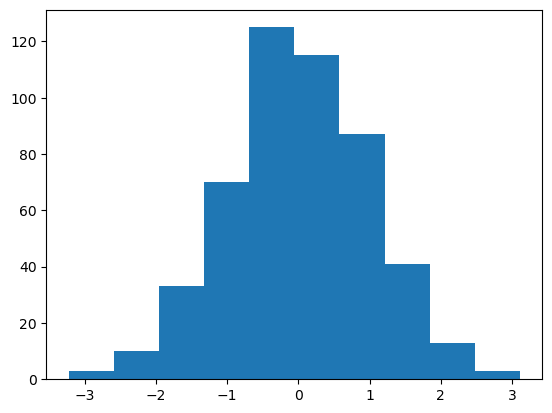

In [86]:
plt.hist(z_group["Age"])

In [87]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [88]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,147.973966,71.389426,47.799681,20856.352489
1,137.044693,63.778397,36.573264,19648.390400
2,140.582055,71.932492,42.795087,20170.940083
3,132.644205,91.800455,31.395468,20600.771197
4,174.679177,70.216800,39.045195,18833.234298
...,...,...,...,...
495,224.713746,12.138051,29.020165,20129.014839
496,157.939153,92.973014,50.673182,19184.804433
497,126.689176,100.509266,13.601540,20536.626849
498,98.527147,65.870380,39.715704,18848.889867


## Other operations on data and groups

In [99]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,147.973966,71.389426,47.799681,20856.352489
2,Male,Rich,140.582055,71.932492,42.795087,20170.940083
3,Female,Middle Class,132.644205,91.800455,31.395468,20600.771197
4,Male,Middle Class,174.679177,70.216800,39.045195,18833.234298
9,Female,Rich,118.924721,41.447451,37.523290,20051.364006
10,Male,Poor,159.327945,109.059891,28.644532,18441.179039


In [95]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
485,Female,Middle Class,174.969976,53.939215,24.229077,20481.601681
495,Female,Poor,224.713746,12.138051,29.020165,20129.014839
496,Male,Rich,157.939153,92.973014,50.673182,19184.804433
497,Female,Rich,126.689176,100.509266,13.601540,20536.626849
498,Male,Middle Class,98.527147,65.870380,39.715704,18848.889867
499,Male,Poor,186.934868,73.736136,13.921968,19205.146943


In [96]:
double_group.nth(32)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     115.469168  20.680359   7.631560  19817.977104
       Poor             152.281885  59.600685  51.540640  20995.601542
       Rich             149.379105  85.549501  32.636258  19628.706251
Male   Middle Class     150.093777  59.856465  38.960996  20353.882422
       Poor             155.865544  42.964577  23.693101  20517.330500
       Rich             183.152437  77.652299  39.851191  20347.108593

In [97]:
double_group.nth(82)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     149.111987  53.441296  35.011853  20869.501964
       Poor             191.314189  53.718382  37.233455  20651.251811
Male   Poor             195.459340  56.340640  40.977437  18159.104424

In [111]:
data_sorted = data.sort_values(["Age", "Income"])

In [101]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
181,Female,Middle Class,111.424615,51.635860,-10.248384,19266.015156
30,Female,Poor,154.407262,59.009717,-1.296830,19362.712409
331,Male,Middle Class,123.289408,107.999552,-0.061129,18687.123028
47,Male,Rich,180.472516,130.976371,1.031157,19017.721149
97,Female,Poor,157.756096,77.644482,1.989414,21383.124418
411,Female,Middle Class,118.397859,13.794004,2.295987,18111.449146
302,Male,Rich,178.115223,62.099444,2.747304,20252.966053
470,Male,Middle Class,222.060525,51.285152,4.272550,19932.490128
25,Male,Rich,140.979539,67.708850,4.433828,18571.267779
167,Male,Poor,125.268987,85.023685,5.198693,21053.724496


In [102]:
age_grouped = data_sorted.groupby("Gender")

In [103]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
181,Female,Middle Class,111.424615,51.635860,-10.248384,19266.015156
331,Male,Middle Class,123.289408,107.999552,-0.061129,18687.123028


In [104]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
187,Male,Poor,196.450437,110.322276,63.055642,20123.802739
352,Female,Rich,178.141222,102.086106,67.780292,18917.412876


In [109]:
data.groupby('Gender').nth(10)

,Economic Status,Height,Weight,Age,Income
Gender,,,,,
Female,Middle Class,154.549373,86.104671,16.334706,19315.278480
Male,Rich,140.979539,67.708850,4.433828,18571.267779
